## Pollutant Data from UCI Repository

In [2]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M') 
# Read data from file
data = pd.read_csv("zhongxin_data_2013_15.csv", usecols=['date', 'PM2_5', 'NO2', 'CO', 'TEMP'],
                   parse_dates=['date'], date_parser=dateparse) #, index_col='date')
data['date']=pd.to_datetime(data.date)
#data.set_index('date', inplace=True)

# Preview the data 
data.head()

,date,PM2_5,NO2,CO,TEMP
0,2013-03-01 00:00:00,4.0,7.0,300.0,-0.7
1,2013-03-01 01:00:00,8.0,7.0,300.0,-1.1
2,2013-03-01 02:00:00,7.0,10.0,300.0,-1.1
3,2013-03-01 03:00:00,6.0,11.0,300.0,-1.4
4,2013-03-01 04:00:00,3.0,12.0,300.0,-2.0


In [3]:
# drop all rows with NaN
data = data.dropna()

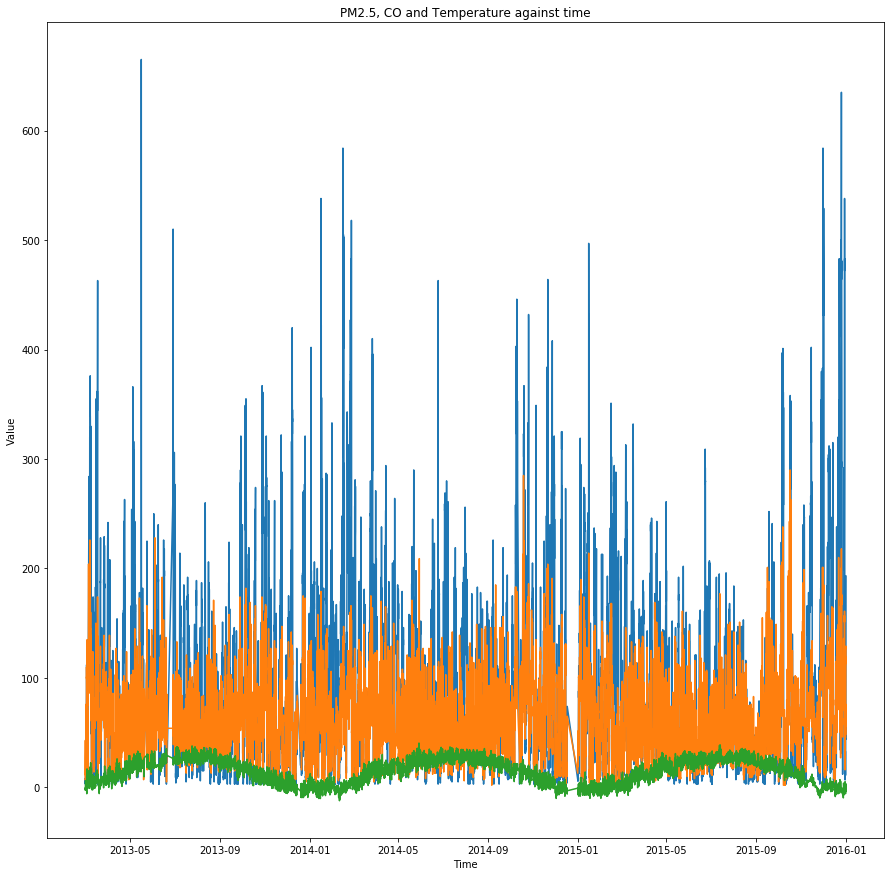

In [27]:
sort = data.sort_values('date')

fig, ax = plt.subplots(figsize=(15,15))
ax.title.set_text('PM2.5, CO and Temperature against time')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

ax.plot(sort.date, sort.PM2_5)
ax.plot(sort.date, sort.NO2)
ax.plot(sort.date, sort.TEMP)

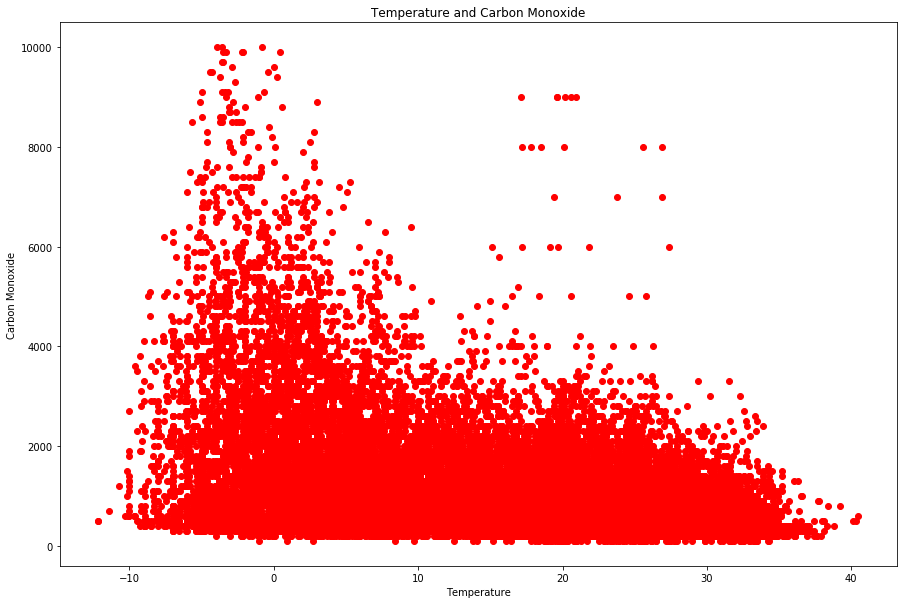

In [4]:
X = np.array(data['TEMP'].dropna().values, dtype=float).reshape(-1, 1)
y = np.array(data['CO'].dropna().values, dtype=float).reshape(-1, 1)

plt.figure(figsize=(15,10))
plt.scatter(X, y, color='red')
plt.title('Temperature and Carbon Monoxide')
plt.xlabel('Temperature')
plt.ylabel('Carbon Monoxide')
plt.show()